In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Import LOB Data, and define new variables like and Mid, Spread.
And also cut off 30 mins after & before trading opens & closes.

In [141]:
df = pd.read_csv(r"Stocks\TSLA\cleaned_data\TSLA_2019-01-03_34200000_57600000_orderbook_10.csv")
del df["Order_ID"]
#del df["Event_Type"]
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%Y-%m-%d %H:%M:%S:%f')
df.set_index(df["DateTime"], inplace=True)
df["Price"] = df["Price"]/10000
#df = df.resample("1s").mean()
df["Direction"] = np.sign(df["Direction"])
df["Mid"] = (df["Ask_Price_Level_1"]+df["Bid_Price_Level_1"])/2
df["Spread"] = df["Ask_Price_Level_1"]-df["Bid_Price_Level_1"]
#df.fillna(method='ffill')  # Forward fill

df.head()


,DateTime,Event_Type,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,...,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,Mid,Spread
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:30:00.708346,2019-01-03 09:30:00.708346,1,50,306.53,1,307.2,1000,307.00,244,307.25,...,308.12,200,306.0,135,308.24,100,305.60,1,307.100,0.20
2019-01-03 09:30:00.716851,2019-01-03 09:30:00.716851,4,25,307.00,1,307.2,1000,307.00,219,307.25,...,308.12,200,306.0,135,308.24,100,305.60,1,307.100,0.20
2019-01-03 09:30:00.716886,2019-01-03 09:30:00.716886,4,128,307.00,1,307.2,1000,307.00,91,307.25,...,308.12,200,306.0,135,308.24,100,305.60,1,307.100,0.20
2019-01-03 09:30:00.716934,2019-01-03 09:30:00.716934,5,230,307.00,-1,307.2,1000,306.99,10,307.25,...,308.12,200,305.6,1,308.24,100,305.50,11,307.095,0.21
2019-01-03 09:30:00.716974,2019-01-03 09:30:00.716974,3,50,306.53,1,307.2,1000,306.99,10,307.25,...,308.12,200,305.5,11,308.24,100,305.41,8,307.095,0.21


let's check our data is in working order by viewing a snapshot of the LOB at any randon time.

Ask_Price_Level_1     302.88
Ask_Price_Level_2     302.89
Ask_Price_Level_3      302.9
Ask_Price_Level_4     302.91
Ask_Price_Level_5     302.92
Ask_Price_Level_6     302.93
Ask_Price_Level_7     302.95
Ask_Price_Level_8     302.96
Ask_Price_Level_9     302.97
Ask_Price_Level_10    302.98
Name: 2019-01-03 12:52:11.365782, dtype: object


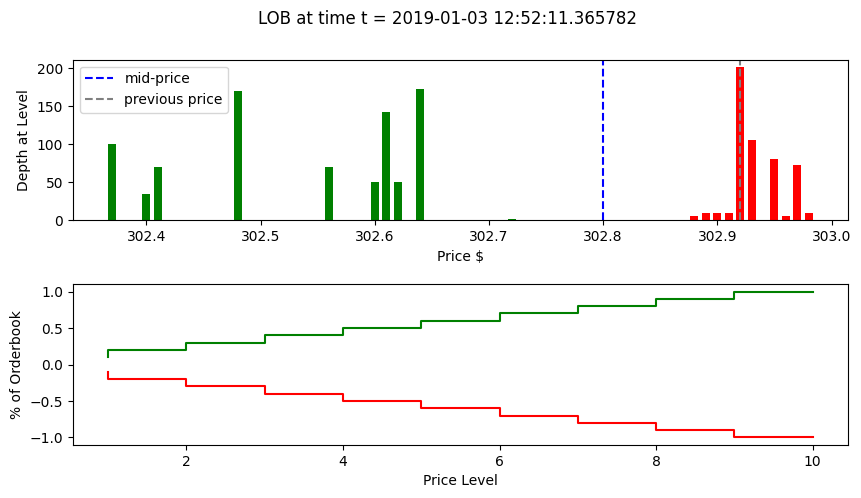

In [142]:
def plot_lob_snapshot(df):
    t = np.random.randint(0,len(df))
    fig, ax = plt.subplots(2,1,figsize=(10,5))
    plt.subplots_adjust(hspace=0.4)
    for i in range(10):
        ax[0].bar(df[f"Ask_Price_Level_{i+1}"].iloc[t],df[f"Ask_Volume_Level_{i+1}"].iloc[t],width=0.007,color="red")
        ax[0].bar(df[f"Bid_Price_Level_{i+1}"].iloc[t],df[f"Bid_Volume_Level_{i+1}"].iloc[t],width=0.007,color="green")
    ax[0].axvline(df["Mid"].iloc[t], color='blue', linestyle='--',label="mid-price")
    ax[0].axvline(df["Price"].iloc[t], color='Gray', linestyle='--',label="previous price")
    print((df.iloc[t, 5:-2:4]))
    ax[1].step(range(1,11),(df.iloc[t, 7:-2:4]).cumsum()/(df.iloc[t, 7:-2:4]).sum(),color="green")
    ax[1].step(range(1,11),-1*(df.iloc[t, 5:-2:4]).cumsum()/(df.iloc[t, 5:-2:4]).sum(),color="red")
    ax[0].set_xlabel("Price $")
    ax[0].set_ylabel("Depth at Level")
    ax[1].set_xlabel("Price Level")
    ax[1].set_ylabel(r"% of Orderbook")
    ax[0].legend()
    fig.suptitle(f"LOB at time t = {df['DateTime'].iloc[t]}")

plot_lob_snapshot(df)

Now let's add a total_volume variable for a 10level depth.

In [143]:
ask_cols = df.columns[7:-2:4]
bid_cols = df.columns[8:-2:4]
ask_cols_l5 = df.columns[7:-25:4]
bid_cols_l5 = df.columns[8:-25:4]

# Calculate the sums using vectorized operations
df["Ask_Volume"] = df[ask_cols].sum(axis=1)
df["Bid_Volume"] = df[bid_cols].sum(axis=1)
df["Ask_Volume_l5"] = df[ask_cols_l5].sum(axis=1)
df["Bid_Volume_l5"] = df[bid_cols_l5].sum(axis=1)

df.head()

,DateTime,Event_Type,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,...,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,Mid,Spread,Ask_Volume,Bid_Volume,Ask_Volume_l5,Bid_Volume_l5
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:30:00.708346,2019-01-03 09:30:00.708346,1,50,306.53,1,307.2,1000,307.00,244,307.25,...,308.24,100,305.60,1,307.100,0.20,3065.51,521,1227.81,306
2019-01-03 09:30:00.716851,2019-01-03 09:30:00.716851,4,25,307.00,1,307.2,1000,307.00,219,307.25,...,308.24,100,305.60,1,307.100,0.20,3065.51,496,1227.81,281
2019-01-03 09:30:00.716886,2019-01-03 09:30:00.716886,4,128,307.00,1,307.2,1000,307.00,91,307.25,...,308.24,100,305.60,1,307.100,0.20,3065.51,368,1227.81,153
2019-01-03 09:30:00.716934,2019-01-03 09:30:00.716934,5,230,307.00,-1,307.2,1000,306.99,10,307.25,...,308.24,100,305.50,11,307.095,0.21,3064.01,288,1227.62,64
2019-01-03 09:30:00.716974,2019-01-03 09:30:00.716974,3,50,306.53,1,307.2,1000,306.99,10,307.25,...,308.24,100,305.41,8,307.095,0.21,3062.89,246,1227.62,64


Now we will also like to track the event type individually using 1/0 as True/Fase

In [144]:
df = pd.get_dummies(df, columns=['Event_Type'], prefix='Is')
for i in range(1,6):
    df[f"Is_{i}"] = df[f"Is_{i}"].astype(int)
df.head()


,DateTime,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,...,Spread,Ask_Volume,Bid_Volume,Ask_Volume_l5,Bid_Volume_l5,Is_1,Is_2,Is_3,Is_4,Is_5
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:30:00.708346,2019-01-03 09:30:00.708346,50,306.53,1,307.2,1000,307.00,244,307.25,1,...,0.20,3065.51,521,1227.81,306,1,0,0,0,0
2019-01-03 09:30:00.716851,2019-01-03 09:30:00.716851,25,307.00,1,307.2,1000,307.00,219,307.25,1,...,0.20,3065.51,496,1227.81,281,0,0,0,1,0
2019-01-03 09:30:00.716886,2019-01-03 09:30:00.716886,128,307.00,1,307.2,1000,307.00,91,307.25,1,...,0.20,3065.51,368,1227.81,153,0,0,0,1,0
2019-01-03 09:30:00.716934,2019-01-03 09:30:00.716934,230,307.00,-1,307.2,1000,306.99,10,307.25,1,...,0.21,3064.01,288,1227.62,64,0,0,0,0,1
2019-01-03 09:30:00.716974,2019-01-03 09:30:00.716974,50,306.53,1,307.2,1000,306.99,10,307.25,1,...,0.21,3062.89,246,1227.62,64,0,0,1,0,0


Let's add some more useful metrics such as Order Book Inbalance(OBI), Relative Spread (RS), Change (delta) in Ask/Bid Price, Weighted Average Price (WAP), Volatility of lookbacks 5,1,10 and M.A of lookbacks 5,10,15

In [145]:
df["OBI"] = (df["Bid_Volume_Level_1"] - df["Ask_Volume_Level_1"] / (df["Bid_Volume_Level_1"] + df["Ask_Volume_Level_1"]))

df["RS"] = (df["Spread"]) / df["Mid"]

df["Delta_AP_1"] = df["Ask_Price_Level_1"] - df["Ask_Price_Level_1"].shift(1)
df["Delta_BP_1"] =  df["Bid_Price_Level_1"] - df["Bid_Price_Level_1"].shift(1)
df["Delta_AP_1"][0] = 0
df["Delta_BP_1"][0] = 0

df["WAP"] = (df["Ask_Price_Level_1"] * df["Bid_Volume_Level_1"] + df["Bid_Price_Level_1"] * df["Ask_Volume_Level_1"]) / (df["Ask_Volume_Level_1"] + df["Bid_Volume_Level_1"])

df['Returns'] = np.log(df['Mid']/df["Mid"].shift(1))
df["Returns"][0] = 0

df["vol_w5"] = df['Returns'].rolling(window=5).std()
df["vol_w5"][0:4] = 0
df["vol_w10"] = df['Returns'].rolling(window=10).std()
df["vol_w10"][0:9] = 0
df["vol_w15"] = df['Returns'].rolling(window=15).std()
df["vol_w15"][0:14] = 0

df["MA_w5"] = df["Returns"].rolling(window=5).mean()
df["MA_w5"][0:4] = 0
df["MA_w10"] = df["Returns"].rolling(window=10).mean()
df["MA_w10"][0:9] = 0
df["MA_w15"] = df["Returns"].rolling(window=15).mean()
df["MA_w15"][0:14] = 0

df["MA5_Order_Direction"] = df["Direction"].rolling(window=5).sum()
df["MA5_Order_Direction"][0:4] = 0
df["MA10_Order_Direction"] = df["Direction"].rolling(window=10).sum()
df["MA10_Order_Direction"][0:9] = 0
df["MA15_Order_Direction"] = df["Direction"].rolling(window=15).sum()
df["MA15_Order_Direction"][0:14] = 0

df.tail()

C:\Users\dbjac\AppData\Local\Temp\ipykernel_20192\3533265753.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Delta_AP_1"][0] = 0
C:\Users\dbjac\AppData\Local\Temp\ipykernel_20192\3533265753.py:7: SettingWithCopyWarning: 
A value is t

,DateTime,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,...,Returns,vol_w5,vol_w10,vol_w15,MA_w5,MA_w10,MA_w15,MA5_Order_Direction,MA10_Order_Direction,MA15_Order_Direction
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 15:59:59.910750,2019-01-03 15:59:59.910750,100,300.34,1,300.36,1100,300.35,865,300.37,739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,11.0
2019-01-03 15:59:59.910750,2019-01-03 15:59:59.910750,100,300.35,1,300.36,1100,300.35,965,300.37,739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,11.0
2019-01-03 15:59:59.914280,2019-01-03 15:59:59.914280,100,300.35,1,300.36,1100,300.35,865,300.37,739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,11.0
2019-01-03 15:59:59.914289,2019-01-03 15:59:59.914289,100,300.34,1,300.36,1100,300.35,865,300.37,739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,11.0
2019-01-03 15:59:59.923772,2019-01-03 15:59:59.923772,100,300.34,1,300.36,1100,300.35,865,300.37,739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,11.0


In [146]:
df['Mid_Next'] = df['Mid'].shift(-1) 
df['Mid_Change'] = df['Mid_Next'] - df['Mid'] 
df.dropna(inplace=True)  
df["Next_Mid_Direction"] = np.sign(df['Mid_Change'])
df["Next_Mid_Direction"] = df["Next_Mid_Direction"].replace({-1:0, 0:1, 1:2})

df.dropna(inplace=True)

y = df['Mid_Change']

In [147]:
del df["DateTime"]
del df["Mid_Next"]

In [148]:
print(df.columns)

Index(['Size', 'Price', 'Direction', 'Ask_Price_Level_1', 'Ask_Volume_Level_1',
       'Bid_Price_Level_1', 'Bid_Volume_Level_1', 'Ask_Price_Level_2',
       'Ask_Volume_Level_2', 'Bid_Price_Level_2', 'Bid_Volume_Level_2',
       'Ask_Price_Level_3', 'Ask_Volume_Level_3', 'Bid_Price_Level_3',
       'Bid_Volume_Level_3', 'Ask_Price_Level_4', 'Ask_Volume_Level_4',
       'Bid_Price_Level_4', 'Bid_Volume_Level_4', 'Ask_Price_Level_5',
       'Ask_Volume_Level_5', 'Bid_Price_Level_5', 'Bid_Volume_Level_5',
       'Ask_Price_Level_6', 'Ask_Volume_Level_6', 'Bid_Price_Level_6',
       'Bid_Volume_Level_6', 'Ask_Price_Level_7', 'Ask_Volume_Level_7',
       'Bid_Price_Level_7', 'Bid_Volume_Level_7', 'Ask_Price_Level_8',
       'Ask_Volume_Level_8', 'Bid_Price_Level_8', 'Bid_Volume_Level_8',
       'Ask_Price_Level_9', 'Ask_Volume_Level_9', 'Bid_Price_Level_9',
       'Bid_Volume_Level_9', 'Ask_Price_Level_10', 'Ask_Volume_Level_10',
       'Bid_Price_Level_10', 'Bid_Volume_Level_10', 'Mid', '

In [149]:
new_order = ['Price', 'Mid','WAP', 'Returns', 'Spread', 'Delta_AP_1', 'Delta_BP_1',
            'Size', 'Direction','MA5_Order_Direction','MA10_Order_Direction','MA15_Order_Direction',
        'Ask_Price_Level_1', 'Ask_Volume_Level_1',
       'Bid_Price_Level_1', 'Bid_Volume_Level_1', 'Ask_Price_Level_2',
       'Ask_Volume_Level_2', 'Bid_Price_Level_2', 'Bid_Volume_Level_2',
       'Ask_Price_Level_3', 'Ask_Volume_Level_3', 'Bid_Price_Level_3',
       'Bid_Volume_Level_3', 'Ask_Price_Level_4', 'Ask_Volume_Level_4',
       'Bid_Price_Level_4', 'Bid_Volume_Level_4', 'Ask_Price_Level_5',
       'Ask_Volume_Level_5', 'Bid_Price_Level_5', 'Bid_Volume_Level_5',
       'Ask_Price_Level_6', 'Ask_Volume_Level_6', 'Bid_Price_Level_6',
       'Bid_Volume_Level_6', 'Ask_Price_Level_7', 'Ask_Volume_Level_7',
       'Bid_Price_Level_7', 'Bid_Volume_Level_7', 'Ask_Price_Level_8',
       'Ask_Volume_Level_8', 'Bid_Price_Level_8', 'Bid_Volume_Level_8',
       'Ask_Price_Level_9', 'Ask_Volume_Level_9', 'Bid_Price_Level_9',
       'Bid_Volume_Level_9', 'Ask_Price_Level_10', 'Ask_Volume_Level_10',
       'Bid_Price_Level_10', 'Bid_Volume_Level_10',
       'Ask_Volume', 'Bid_Volume', 'Ask_Volume_l5', 'Bid_Volume_l5',
        'OBI', 'RS', 'vol_w5', 'vol_w10', 'vol_w15', 'MA_w5', 'MA_w10','MA_w15',
        'Is_1','Is_2', 'Is_3', 'Is_4', 'Is_5',
        'Next_Mid_Direction',"Mid_Change"]



# Reorder using reindex
df = df.reindex(columns=new_order)

In [150]:
df.head()

,Price,Mid,WAP,Returns,Spread,Delta_AP_1,Delta_BP_1,Size,Direction,MA5_Order_Direction,...,MA_w5,MA_w10,MA_w15,Is_1,Is_2,Is_3,Is_4,Is_5,Next_Mid_Direction,Mid_Change
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:30:00.708346,306.53,307.100,307.039228,0.000000,0.20,0.0,0.00,50,1,0.0,...,0.000000,0.0,0.0,1,0,0,0,0,1.0,0.000
2019-01-03 09:30:00.716851,307.00,307.100,307.035931,0.000000,0.20,0.0,0.00,25,1,0.0,...,0.000000,0.0,0.0,0,0,0,1,0,1.0,0.000
2019-01-03 09:30:00.716886,307.00,307.100,307.016682,0.000000,0.20,0.0,0.00,128,1,0.0,...,0.000000,0.0,0.0,0,0,0,1,0,0.0,-0.005
2019-01-03 09:30:00.716934,307.00,307.095,306.992079,-0.000016,0.21,0.0,-0.01,230,-1,0.0,...,0.000000,0.0,0.0,0,0,0,0,1,1.0,0.000
2019-01-03 09:30:00.716974,306.53,307.095,306.992079,0.000000,0.21,0.0,0.00,50,1,3.0,...,-0.000003,0.0,0.0,0,0,1,0,0,1.0,0.000


In [151]:
df.tail()

,Price,Mid,WAP,Returns,Spread,Delta_AP_1,Delta_BP_1,Size,Direction,MA5_Order_Direction,...,MA_w5,MA_w10,MA_w15,Is_1,Is_2,Is_3,Is_4,Is_5,Next_Mid_Direction,Mid_Change
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 15:59:59.909629,300.34,300.355,300.354402,0.0,0.01,0.0,0.0,100,1,3.0,...,0.0,0.0,0.0,1,0,0,0,0,1.0,0.0
2019-01-03 15:59:59.910750,300.34,300.355,300.354402,0.0,0.01,0.0,0.0,100,1,5.0,...,0.0,0.0,0.0,0,0,1,0,0,1.0,0.0
2019-01-03 15:59:59.910750,300.35,300.355,300.354673,0.0,0.01,0.0,0.0,100,1,5.0,...,0.0,0.0,0.0,1,0,0,0,0,1.0,0.0
2019-01-03 15:59:59.914280,300.35,300.355,300.354402,0.0,0.01,0.0,0.0,100,1,5.0,...,0.0,0.0,0.0,0,0,1,0,0,1.0,0.0
2019-01-03 15:59:59.914289,300.34,300.355,300.354402,0.0,0.01,0.0,0.0,100,1,5.0,...,0.0,0.0,0.0,1,0,0,0,0,1.0,0.0


In [152]:
df.to_csv(r'CNNData\fulldata.csv')


In [153]:
"""Notes:

o1:
new_order = ['Size', 'Price', 'MA_w5', 'MA_w10', 'MA_w15',
         'Direction' ,'MA5_Order_Direction',
       'MA10_Order_Direction', 'MA15_Order_Direction',
         'Ask_Price_Level_1', 'Ask_Volume_Level_1',
       'Bid_Price_Level_1', 'Bid_Volume_Level_1', 'Ask_Price_Level_2',
       'Ask_Volume_Level_2', 'Bid_Price_Level_2', 'Bid_Volume_Level_2',
       'Ask_Price_Level_3', 'Ask_Volume_Level_3', 'Bid_Price_Level_3',
       'Bid_Volume_Level_3', 'Ask_Price_Level_4', 'Ask_Volume_Level_4',
       'Bid_Price_Level_4', 'Bid_Volume_Level_4', 'Ask_Price_Level_5',
       'Ask_Volume_Level_5', 'Bid_Price_Level_5', 'Bid_Volume_Level_5',
       'Ask_Price_Level_6', 'Ask_Volume_Level_6', 'Bid_Price_Level_6',
       'Bid_Volume_Level_6', 'Ask_Price_Level_7', 'Ask_Volume_Level_7',
       'Bid_Price_Level_7', 'Bid_Volume_Level_7', 'Ask_Price_Level_8',
       'Ask_Volume_Level_8', 'Bid_Price_Level_8', 'Bid_Volume_Level_8',
       'Ask_Price_Level_9', 'Ask_Volume_Level_9', 'Bid_Price_Level_9',
       'Bid_Volume_Level_9', 'Ask_Price_Level_10', 'Ask_Volume_Level_10',
       'Bid_Price_Level_10', 'Bid_Volume_Level_10', 'Mid', 'Spread',
       'Ask_Volume', 'Bid_Volume', 'Ask_Volume_l5', 'Bid_Volume_l5', 'OBI',
       'RS', 'Delta_AP_1', 'Delta_BP_1', 'WAP', 'Returns', 'vol_w5', 'vol_w10',
       'vol_w15', 'Mid_Change',
       'Next_Mid_Direction']
02:
new_order = ["Size", "Price", 
"MA_w5", "MA_w10", "MA_w15", 
"Direction", "MA5_Order_Direction", "MA10_Order_Direction", "MA15_Order_Direction", 
"Ask_Price_Level_1", "Ask_Price_Level_2", "Ask_Price_Level_3", "Ask_Price_Level_4", "Ask_Price_Level_5", "Ask_Price_Level_6", "Ask_Price_Level_7", "Ask_Price_Level_8", "Ask_Price_Level_9", "Ask_Price_Level_10", 
"Ask_Volume_Level_1", "Ask_Volume_Level_2", "Ask_Volume_Level_3", "Ask_Volume_Level_4", "Ask_Volume_Level_5", "Ask_Volume_Level_6", "Ask_Volume_Level_7", "Ask_Volume_Level_8", "Ask_Volume_Level_9", "Ask_Volume_Level_10", 
"Bid_Price_Level_1", "Bid_Price_Level_2", "Bid_Price_Level_3", "Bid_Price_Level_4", "Bid_Price_Level_5", "Bid_Price_Level_6", "Bid_Price_Level_7", "Bid_Price_Level_8", "Bid_Price_Level_9", "Bid_Price_Level_10", 
"Bid_Volume_Level_1", "Bid_Volume_Level_2", "Bid_Volume_Level_3", "Bid_Volume_Level_4", "Bid_Volume_Level_5", "Bid_Volume_Level_6", "Bid_Volume_Level_7", "Bid_Volume_Level_8", "Bid_Volume_Level_9", "Bid_Volume_Level_10", 
"Mid", "Spread", 
"Ask_Volume", "Bid_Volume", "Ask_Volume_l5", "Bid_Volume_l5", "OBI", "RS", "Delta_AP_1", "Delta_BP_1", "WAP", "Returns", 
"vol_w5", "vol_w10", "vol_w15", 
"Mid_Change", "Next_Mid_Direction"
]
"""

'Notes:\n\no1:\nnew_order = [\'Size\', \'Price\', \'MA_w5\', \'MA_w10\', \'MA_w15\',\n         \'Direction\' ,\'MA5_Order_Direction\',\n       \'MA10_Order_Direction\', \'MA15_Order_Direction\',\n         \'Ask_Price_Level_1\', \'Ask_Volume_Level_1\',\n       \'Bid_Price_Level_1\', \'Bid_Volume_Level_1\', \'Ask_Price_Level_2\',\n       \'Ask_Volume_Level_2\', \'Bid_Price_Level_2\', \'Bid_Volume_Level_2\',\n       \'Ask_Price_Level_3\', \'Ask_Volume_Level_3\', \'Bid_Price_Level_3\',\n       \'Bid_Volume_Level_3\', \'Ask_Price_Level_4\', \'Ask_Volume_Level_4\',\n       \'Bid_Price_Level_4\', \'Bid_Volume_Level_4\', \'Ask_Price_Level_5\',\n       \'Ask_Volume_Level_5\', \'Bid_Price_Level_5\', \'Bid_Volume_Level_5\',\n       \'Ask_Price_Level_6\', \'Ask_Volume_Level_6\', \'Bid_Price_Level_6\',\n       \'Bid_Volume_Level_6\', \'Ask_Price_Level_7\', \'Ask_Volume_Level_7\',\n       \'Bid_Price_Level_7\', \'Bid_Volume_Level_7\', \'Ask_Price_Level_8\',\n       \'Ask_Volume_Level_8\', \'Bid_Pric